## Basic operations with Atmospheric data on native grid

In [1]:
from dask.distributed import Client
client = Client(scheduler_file='/proj/eunbyeol/MPI/scheduler.json')  
client

<Client: 'tcp://203.247.189.224:41752' processes=7 threads=126, memory=586.73 GiB>

In [2]:
import xarray as xr
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmcrameri.cm as cm 

In [4]:
model = 'awicm3-TCo319'
expid = 'TCo319-DART' 
version = 'ctl1950d-gibbs-charn'
realm = 'oifs'
base_p = f"/scratch/{model}/{expid}-{version}/outdata/{realm}/"

In [5]:
model = 'awicm3-TCo319'
expid = 'TCo319-DART' 
version = 'ssp585d-gibbs-charn'
realm = 'oifs'
base_f = f"/scratch/{model}/{expid}-{version}/outdata/{realm}/"


In [6]:
# -------------------
# 1) YEAR RANGE FUNCTION (FIXED)
# -------------------
def extract_year_range(fname):
    m = re.search(r'_(\d{4})-(\d{4})\.nc$', fname)
    if m:
        y1 = int(m.group(1)[0:4])
        y2 = int(m.group(2)[0:4])
        return y1, y2
    return None, None   

In [7]:
# -------------------
# 2) Get file list
# -------------------
files_f = os.listdir(base_f)
files_p = os.listdir(base_p)
# -------------------
# 3) Target variable
# -------------------
target = "1d_2t"
var_key = target.split("_", 1)[1]   # "2t"

In [8]:
# -------------------
# 4) Select files by year
# -------------------
p_start_year = 1950
p_end_year = 1959

ds_files_p = sorted([f for f in files_p if target in f])

selected_files_p = []

for f in ds_files_p:
    y1, y2 = extract_year_range(f)
    if y1 is None:
        continue
    if (y2 >= p_start_year) and (y1 <= p_end_year):
        selected_files_p.append(os.path.join(base_p, f))
      

In [9]:
selected_files_p

['/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1950-1950.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1951-1951.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1952-1952.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1953-1953.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1954-1954.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1955-1955.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1956-1956.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1957-1957.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ctl1950d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_1958-1958.nc',
 '/scratch/awicm3-TCo319/TCo

In [10]:
var_key

'2t'

In [11]:
f_start_year = 2080
f_end_year = 2089

ds_files_f = sorted([f for f in files_f if target in f])

selected_files_f = []

for f in ds_files_f:
    y1, y2 = extract_year_range(f)
    if y1 is None:
        continue
    if (y2 >= f_start_year) and (y1 <= f_end_year):
        selected_files_f.append(os.path.join(base_f, f))

# print("Selected files:", selected_files)

In [12]:
selected_files_f

['/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2080-2080.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2081-2081.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2082-2082.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2083-2083.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2084-2084.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2085-2085.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2086-2086.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2087-2087.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-ssp585d-gibbs-charn/outdata/oifs/atm_remapped_1d_2t_1d_2088-2088.nc',
 '/scratch/awicm3-TCo319/TCo319-DART-

In [13]:
# -------------------
# 5) Open dataset (FIXED)
# -------------------
ds_p = xr.open_mfdataset(
    selected_files_p,
    combine='by_coords',
    parallel=True,
    chunks={"time": 100},
)

print(ds_p)

<xarray.Dataset> Size: 12GB
Dimensions:               (time_counter: 3652, axis_nbounds: 2, lat: 640,
                           lon: 1312)
Coordinates:
  * lat                   (lat) float32 3kB -89.86 -89.58 -89.3 ... 89.58 89.86
  * lon                   (lon) float32 5kB 0.1372 0.4116 0.686 ... 359.6 359.9
    time_centered         (time_counter) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 29kB 1950-01-01T12:00...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    2t                    (time_counter, lat, lon) float32 12GB dask.array<chunksize=(1, 640, 1312), meta=np.ndarray>
Attributes:
    name:         atm_remapped_1d_2t_1d
    description:  ECE4/OIFS 

In [14]:
# -------------------
# 5) Open dataset (FIXED)
# -------------------
ds_f = xr.open_mfdataset(
    selected_files_f,
    combine='by_coords',
    parallel=True,
    chunks={"time": 100},
)

print(ds_f)

<xarray.Dataset> Size: 12GB
Dimensions:               (time_counter: 3653, axis_nbounds: 2, lat: 640,
                           lon: 1312)
Coordinates:
  * lat                   (lat) float32 3kB -89.86 -89.58 -89.3 ... 89.58 89.86
  * lon                   (lon) float32 5kB 0.1372 0.4116 0.686 ... 359.6 359.9
    time_centered         (time_counter) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 29kB 2080-01-01T12:00...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    2t                    (time_counter, lat, lon) float32 12GB dask.array<chunksize=(1, 640, 1312), meta=np.ndarray>
Attributes:
    name:         atm_remapped_1d_2t_1d
    description:  ECE4/OIFS 

In [15]:
# -------------------
# 6) Variable load
# -------------------
if var_key not in ds_p:
    raise KeyError(f"Variable {var_key} not found. Available: {list(ds.data_vars.keys())}")

da_p = ds_p[var_key]

# -------------------
# 7) Select by time
# -------------------
time_dim = "time_counter" if "time_counter" in da_p.dims else "time"

da_sel_p = da_p.sel({time_dim: slice(f"{p_start_year}-01-01", f"{p_end_year}-12-31")})

In [16]:
# -------------------
# 6) Variable load
# -------------------
if var_key not in ds_f:
    raise KeyError(f"Variable {var_key} not found. Available: {list(ds.data_vars.keys())}")

da_f = ds_f[var_key]

# -------------------
# 7) Select by time
# -------------------
time_dim = "time_counter" if "time_counter" in da_f.dims else "time"

da_sel_f = da_f.sel({time_dim: slice(f"{f_start_year}-01-01", f"{f_end_year}-12-31")})

In [17]:
# -------------------
# 8) Mean
# -------------------
with ProgressBar():
    da_mean_p = da_sel_p.mean(dim=time_dim).compute()

print(da_mean_p)

<xarray.DataArray '2t' (lat: 640, lon: 1312)> Size: 3MB
array([[227.76648, 227.76743, 227.76839, ..., 227.76355, 227.76453,
        227.7655 ],
       [228.25806, 227.90198, 228.26198, ..., 228.25215, 227.89609,
        228.25609],
       [228.43243, 228.43452, 228.43646, ..., 228.42639, 228.4285 ,
        228.43042],
       ...,
       [256.23413, 256.23575, 256.2372 , ..., 256.22943, 256.23108,
        256.23257],
       [256.2243 , 255.82277, 256.226  , ..., 256.22177, 255.82027,
        256.22348],
       [256.2461 , 256.2465 , 256.24686, ..., 256.24496, 256.2453 ,
        256.24573]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.86 -89.58 -89.3 -89.02 ... 89.3 89.58 89.86
  * lon      (lon) float32 5kB 0.1372 0.4116 0.686 0.9604 ... 359.3 359.6 359.9


In [18]:
# -------------------
# 8) Mean
# -------------------
with ProgressBar():
    da_mean_f = da_sel_f.mean(dim=time_dim).compute()

print(da_mean_f)

<xarray.DataArray '2t' (lat: 640, lon: 1312)> Size: 3MB
array([[234.82497, 234.82556, 234.82607, ..., 234.82327, 234.82387,
        234.82443],
       [235.26213, 234.894  , 235.26402, ..., 235.25926, 234.89111,
        235.26117],
       [235.41846, 235.4192 , 235.41983, ..., 235.4164 , 235.41716,
        235.41776],
       ...,
       [270.26544, 270.26767, 270.26968, ..., 270.25894, 270.2612 ,
        270.26328],
       [270.22815, 269.80505, 270.2306 , ..., 270.22452, 269.8014 ,
        270.22693],
       [270.2115 , 270.21198, 270.2125 , ..., 270.21   , 270.21048,
        270.211  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.86 -89.58 -89.3 -89.02 ... 89.3 89.58 89.86
  * lon      (lon) float32 5kB 0.1372 0.4116 0.686 0.9604 ... 359.3 359.6 359.9


In [19]:
sstep = 10  
lon = ds_f["lon"].compute()
lat = ds_f["lat"].compute()

In [20]:
lon.shape

(1312,)

In [21]:
da_mean_p

<xarray.DataArray '2t' (lat: 640, lon: 1312)> Size: 3MB
array([[227.76648, 227.76743, 227.76839, ..., 227.76355, 227.76453,
        227.7655 ],
       [228.25806, 227.90198, 228.26198, ..., 228.25215, 227.89609,
        228.25609],
       [228.43243, 228.43452, 228.43646, ..., 228.42639, 228.4285 ,
        228.43042],
       ...,
       [256.23413, 256.23575, 256.2372 , ..., 256.22943, 256.23108,
        256.23257],
       [256.2243 , 255.82277, 256.226  , ..., 256.22177, 255.82027,
        256.22348],
       [256.2461 , 256.2465 , 256.24686, ..., 256.24496, 256.2453 ,
        256.24573]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.86 -89.58 -89.3 -89.02 ... 89.3 89.58 89.86
  * lon      (lon) float32 5kB 0.1372 0.4116 0.686 0.9604 ... 359.3 359.6 359.9

In [22]:
file_to_use = selected_files_p[0]  # 원하는 인덱스로 변경 가능
ds = xr.open_dataset(file_to_use)
var = ds[var_key]
long_name = var.attrs.get('long_name', var_key)

In [23]:
import os

folder_name = "step02_319"              
save_dir = os.path.join(os.getcwd(), folder_name)  # 현재 폴더 안에 생성
os.makedirs(save_dir, exist_ok=True)             # 폴더 없으면 생성


Figure saved to: /mnt/lustre/proj/eunbyeol/Hackaton2025/step02_319/temperature2t_319.png


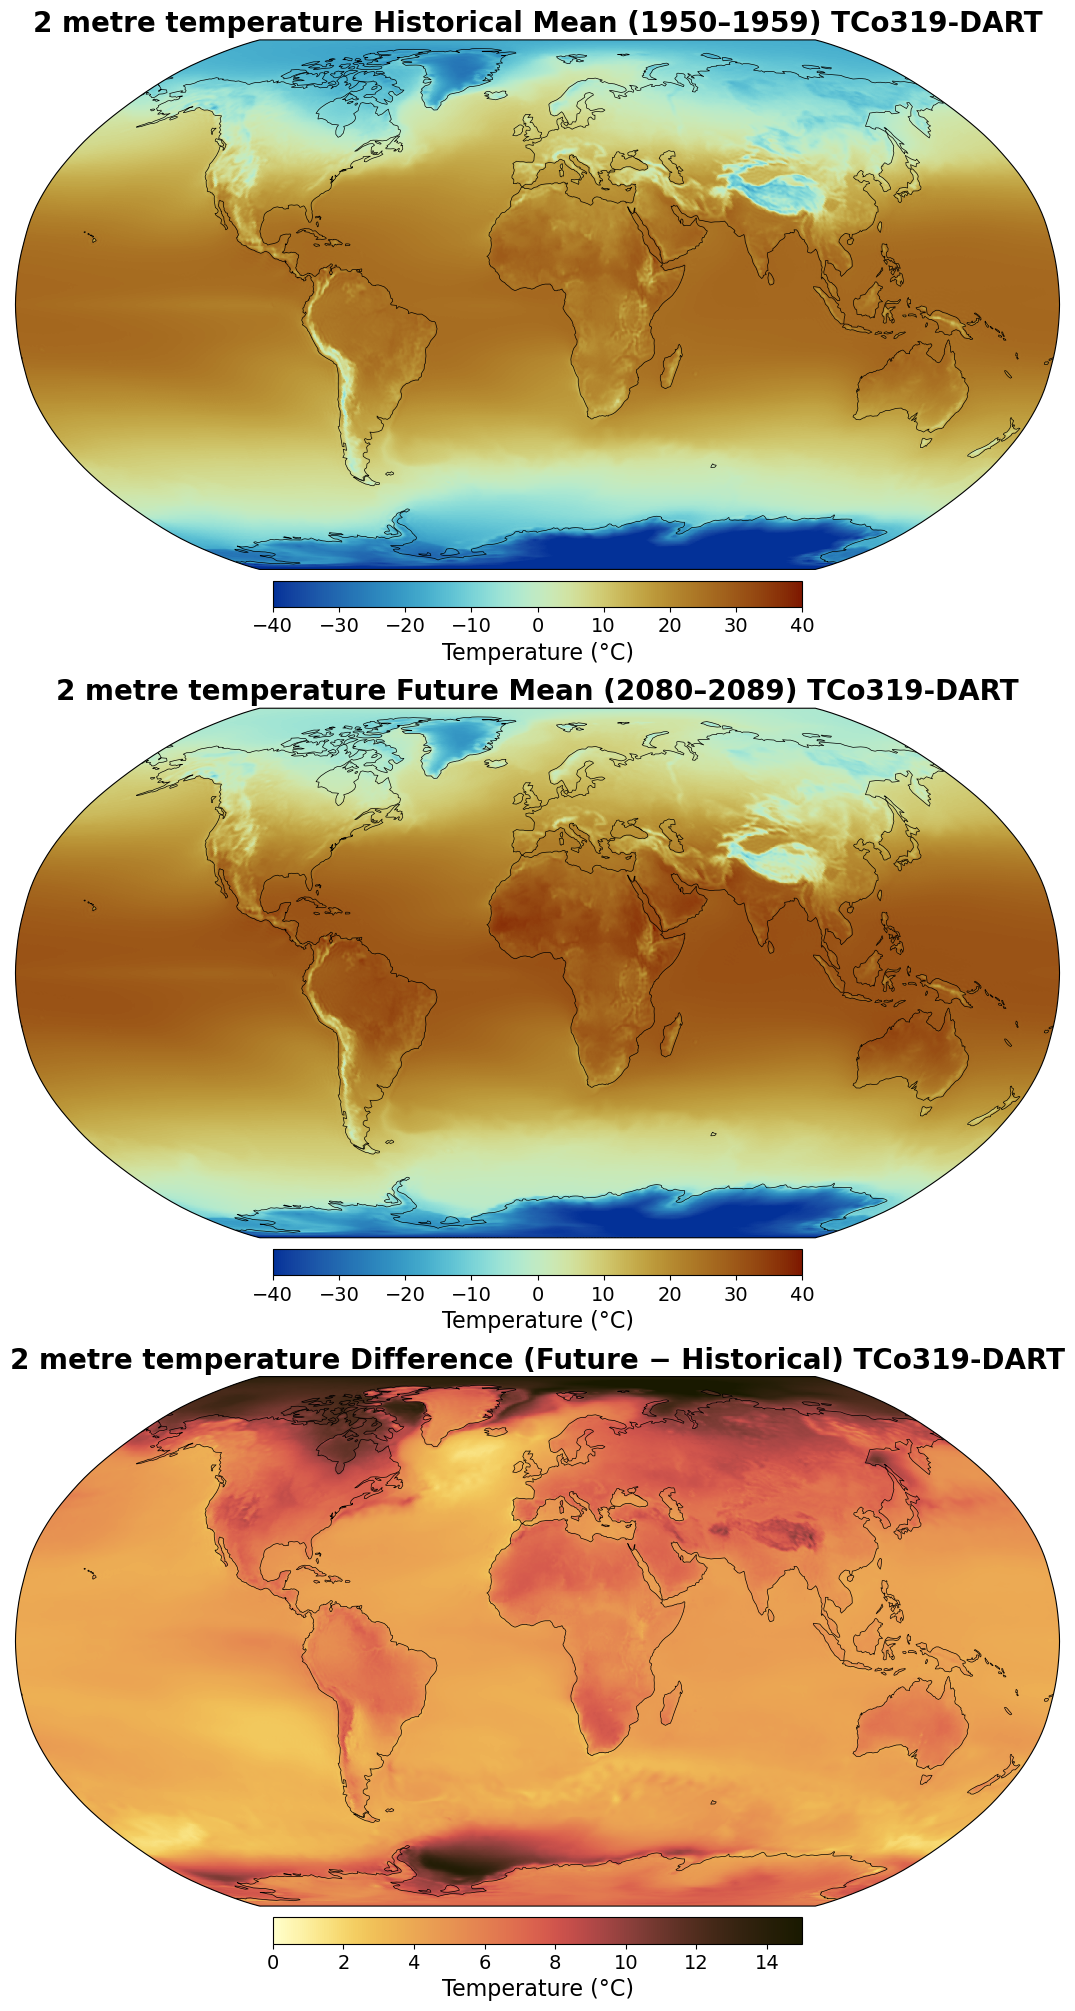

In [24]:
# 데이터 준비
lat = da_mean_p['lat'].values      # (640,)
lon = da_mean_p['lon'].values      # (1312,)

hist = da_mean_p.values-273            # (640, 1312)
fut  = da_mean_f.values-273
diff = fut - hist
c_ranges   = [(-40, 40), (-40, 40), (0, 15)]
datasets = [hist, fut, diff]
titles = [
    f'{long_name} Historical Mean (1950–1959) {expid}',
    f'{long_name} Future Mean (2080–2089) {expid}',
    f'{long_name} Difference (Future − Historical) {expid}'
]

# titles = ['{long_name} Historical Mean (1991–2000) {expid}',
#           '{long_name} Future Mean (2081–2100) {expid}',
#           '{long_name} Difference (Future − Historical) {expid}']

fig, axes = plt.subplots(
    3, 1,
    figsize=(12, 20),
    subplot_kw={'projection': ccrs.Robinson()},
    constrained_layout=True
)

# meshgrid 만들기
lon2d, lat2d = np.meshgrid(lon, lat)

for ax, data, title, (vmin, vmax) in zip(axes, datasets, titles, c_ranges):
    ax.set_global()
    ax.coastlines(linewidth=0.5)
    
    # pcolorm으로 지도에 데이터 표시
    im = ax.pcolormesh(
        lon2d, lat2d, data,
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
        shading='auto',       
        cmap = cm.lajolla_r if "Difference" in title else cm.roma_r 
    )

    ax.set_title(title, fontsize=20, fontweight='bold')
    
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.02, shrink=0.75,fraction=0.05)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label("Temperature (°C)" if title != "Difference (Future − Historical)" else "ΔT (°C)",
                   size='16')


save_path = os.path.join(save_dir, "temperature2t_319.png")

fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")

plt.show()


## Cut region

Figure saved to: /mnt/lustre/proj/eunbyeol/Hackaton2025/step02_319/temperature2t_319_Himalaya.png


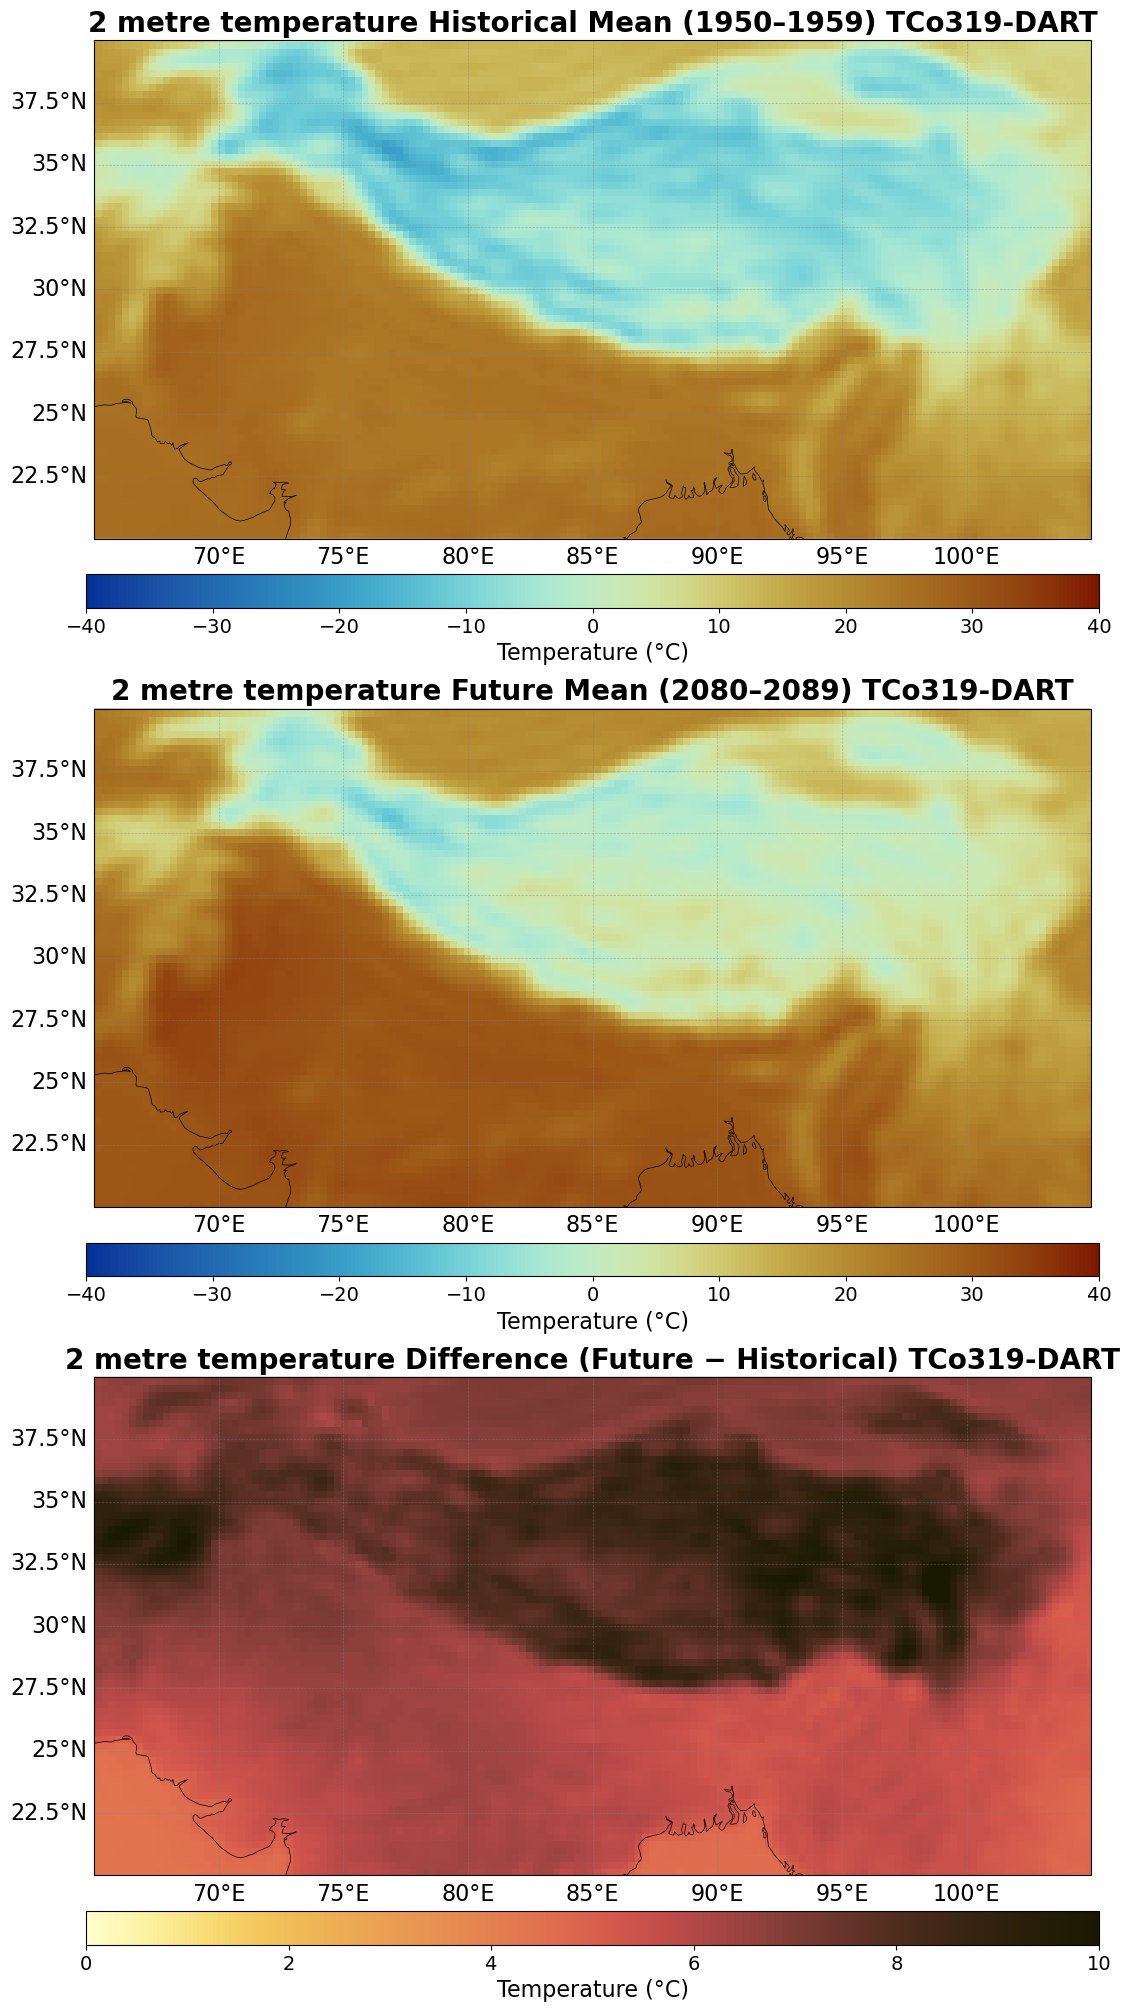

In [25]:
left, right = 65, 105
bottom, top = 20, 40
c_ranges   = [(-40, 40), (-40, 40), (0, 10)]

fig, axes = plt.subplots(
    3, 1,
    figsize=(12, 20),
    subplot_kw={'projection': ccrs.PlateCarree()},  # 또는 LambertConformal
    constrained_layout=True
)

lon2d, lat2d = np.meshgrid(lon, lat)

for ax, data, title, (vmin, vmax) in zip(axes, datasets, titles, c_ranges):
    ax.set_extent([left, right, bottom, top], crs=ccrs.PlateCarree())  # 영역 제한
    ax.coastlines(linewidth=0.5)
    
    im = ax.pcolormesh(
        lon2d, lat2d, data,
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
        shading='auto',
        cmap = cm.lajolla_r if "Difference" in title else cm.roma_r 
    )

    # 위경도 눈금 표시
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False     # 상단 눈금 제거
    gl.right_labels = False   # 오른쪽 눈금 제거
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}

    ax.set_title(title, fontsize=20, fontweight='bold')
    
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01, shrink=0.85, fraction=0.1,aspect=30)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label("Temperature (°C)" if title != "Difference (Future − Historical)" else "ΔT (°C)",
                   size='16')

save_path = os.path.join(save_dir, "temperature2t_319_Himalaya.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")
plt.show()


Figure saved to: /mnt/lustre/proj/eunbyeol/Hackaton2025/step02_319/temperature2t_319_Alphs.png


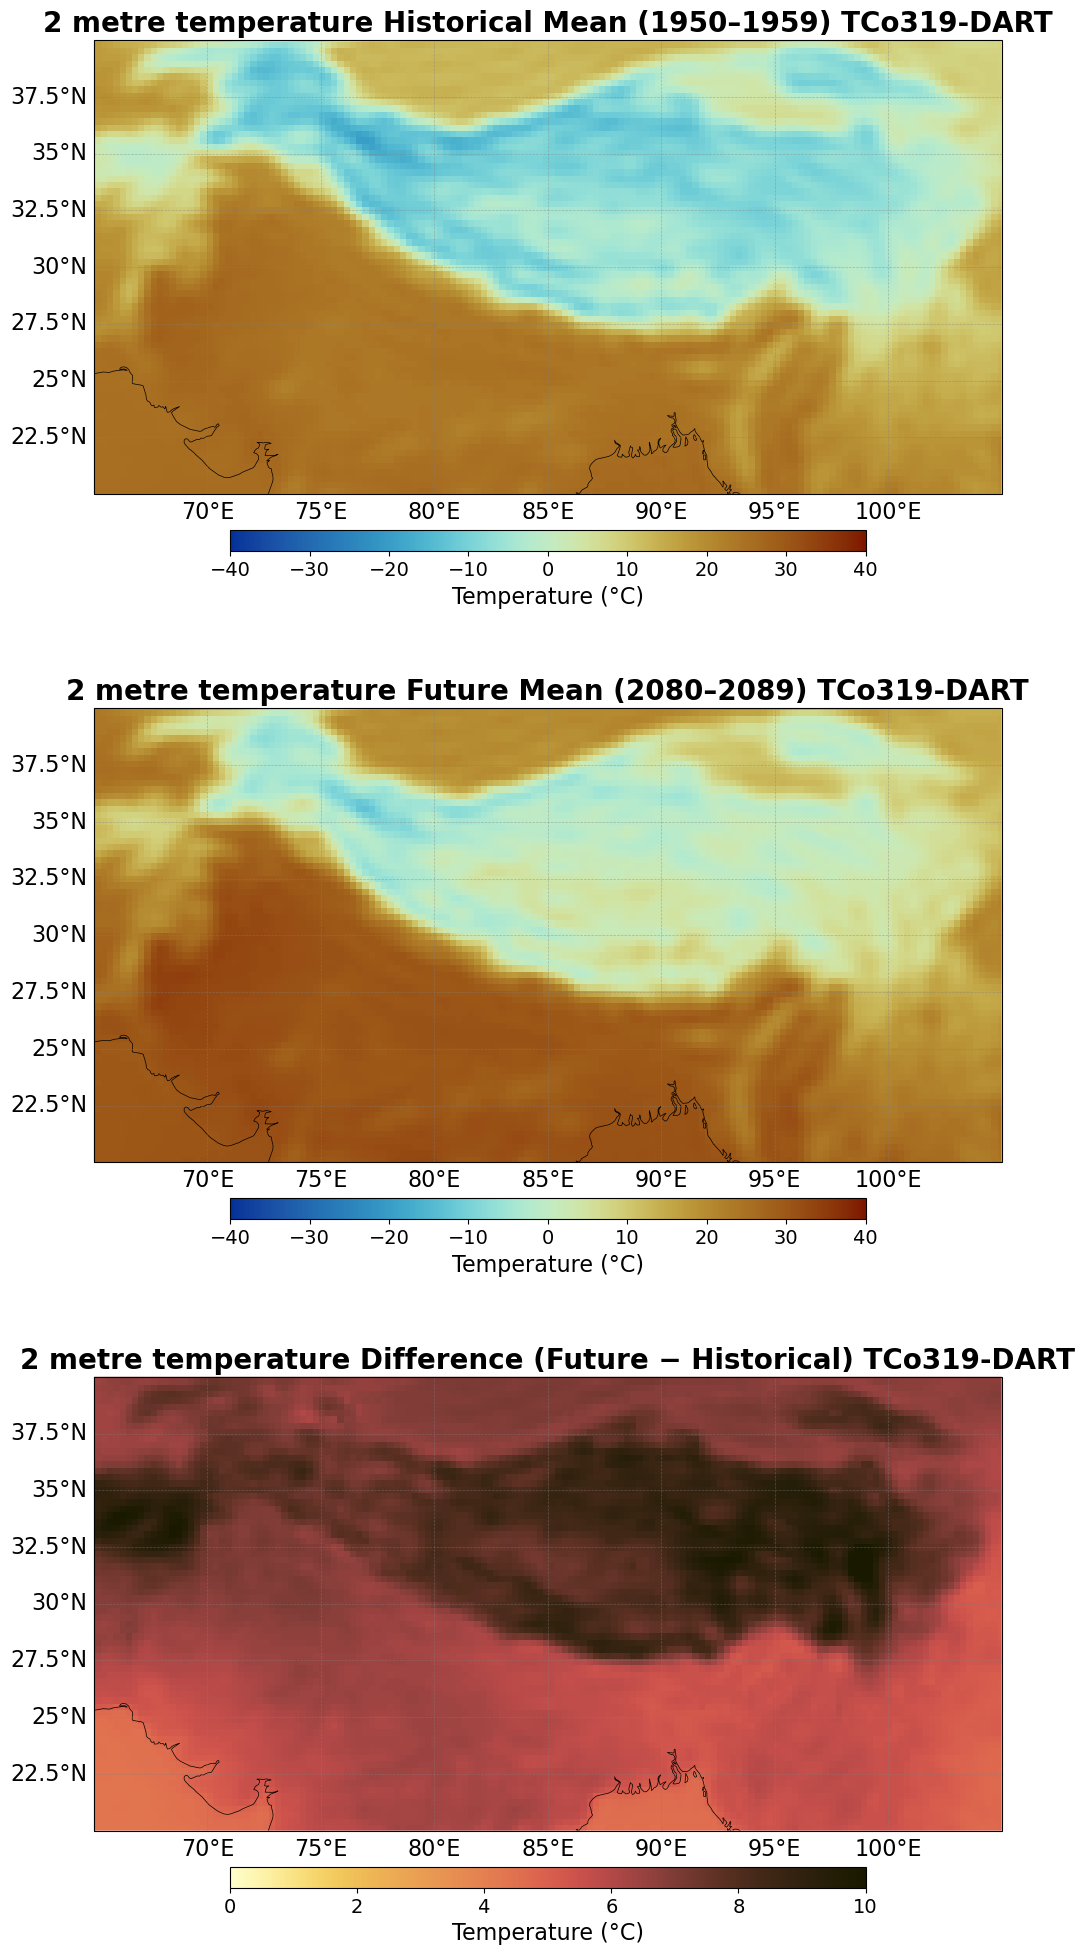

In [26]:
left, right = 3, 17
bottom, top = 39, 49
left, right = 65, 105
bottom, top = 20, 40
c_ranges   = [(-40, 40), (-40, 40), (0, 10)]

fig, axes = plt.subplots(
    3, 1,
    figsize=(10, 20),
    subplot_kw={'projection': ccrs.PlateCarree()},  # 또는 LambertConformal
    constrained_layout=True
)

lon2d, lat2d = np.meshgrid(lon, lat)

for ax, data, title, (vmin, vmax) in zip(axes, datasets, titles, c_ranges):
    ax.set_extent([left, right, bottom, top], crs=ccrs.PlateCarree())  # 영역 제한
    ax.coastlines(linewidth=0.5)
    
    im = ax.pcolormesh(
        lon2d, lat2d, data,
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
        shading='auto',
        cmap = cm.lajolla_r if "Difference" in title else cm.roma_r
    )

    # 위경도 눈금 표시
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False     # 상단 눈금 제거
    gl.right_labels = False   # 오른쪽 눈금 제거
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}

    ax.set_title(title, fontsize=20, fontweight='bold')
    
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01, shrink=0.70, fraction=0.1,aspect=30)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label("Temperature (°C)" if title != "Difference (Future − Historical)" else "ΔT (°C)",
                   size='16')

save_path = os.path.join(save_dir, "temperature2t_319_Alphs.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")
plt.show()


## Cut region

In [27]:
left = 70
right = 100
bottom = 20
top = 36

region = (lon < right) & (lon>left) & (lat > bottom) & (lat < top)


ValueError: operands could not be broadcast together with shapes (1312,) (640,) 

In [ ]:
ds_mean

In [ ]:
# data_sample = ds[var_key][0,:].values
data_sample = ds_mean[var_key].values

In [ ]:
data_sample[region]

In [ ]:

plt.figure(figsize=(20,10))
plt.scatter(lon[region], lat[region], s=30 , c=data_sample[region])
plt.colorbar(orientation='horizontal', pad=0.04)

## Simple map with projection

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm

In [ ]:
sstep = 50
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')
ax.scatter(lon[::sstep], lat[::sstep], s=1 , c=data_sample[::sstep],
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree())

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='k')
ax.set_extent([left, right, bottom, top], crs=ccrs.PlateCarree())
mm = ax.scatter(lon[region], lat[region], s=5 , c=data_sample[region]-273, 
           vmin=-20, vmax=20,
           cmap=cm.RdBu_r, transform=ccrs.PlateCarree())
plt.colorbar(mm, orientation='horizontal', pad=0.04)

## Simple interpolation to a regular grid

In [ ]:
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator

In [ ]:
lon_geo = np.linspace(120, 140, 160)
lat_geo = np.linspace(30, 45, 160)
lon_geo2, lat_geo2 = np.meshgrid(lon_geo, lat_geo)

In [ ]:
points = np.vstack((lon, lat)).T

In [ ]:
%%time
nn_interpolation = NearestNDInterpolator(points, data_sample)

In [ ]:
interpolated_nn = nn_interpolation((lon_geo2, lat_geo2))

In [ ]:
plt.imshow(interpolated_nn)

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='k')
# ax.set_extent([left, right, bottom, top], crs=ccrs.PlateCarree())
#ax.stock_img()
img = ax.contourf(lon_geo, lat_geo, interpolated_nn-273, 
           levels = np.linspace(-30,30,31),
           cmap=cm.RdBu_r, transform=ccrs.PlateCarree())
# ax.contour(lon_geo, lat_geo, interpolated_nn-273, 
#            levels = np.linspace(-30,30,31),
#            transform=ccrs.PlateCarree(), colors='k', linewidths=0.5)
#ax.add_feature(
#            cfeature.GSHHSFeature(levels=[1], scale="low", facecolor="lightgray")
#        )
#ax.stock_img()
# ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='black')
cbar = plt.colorbar(img, orientation='horizontal', pad=0.03)
cbar.set_label('$^\circ$C')